# Проект: Статистический анализ данных

**Описание проекта**

Для аналитики популярного сервиса аренды самокатов GoFast нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;
с подпиской Ultra абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

**Описание данных**
В основных данных есть информация о пользователях, их поездках и подписках.

**План Исследования:**
* загрузка данных и поверхностное их изучение;
* предобработка данных;
* исследовательский анализ данных;
* объединение данных;
* подсчёт выручки;
* проверка гипотез;
* распределения;
* общий вывод

In [1]:
import pandas as pd

#### Шаг 1. Загрузка данных

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [8]:
data_subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Предварительный вывод**

Мы считали данные. Предварительно по нашим данным:
* по первой таблице 5 столбцов и 1565 строк, колоичество строк не отличается между столбцами;
* по второй таблице 4 столбца и 18068 строк, аналогично количество строк не отличается между столбцами;
    * в столбце с датой тип данных - `object`, необходимо будет изменить в дальнейшем на тип `datetime`
* по 3 таблице там всего 4 столбца и 2 строки

#### Шаг 2. Предобработка данных

##### Зафиксируем длину первых двух датафреймов

In [9]:
len(data_users)

1565

In [10]:
len(data_rides)

18068

##### Изменим тип данных в столбце `date` датафрейма `data_rides` с `object` на `datetime`

In [11]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

##### Создадим новый столбец `month` с номером месяца на основе столбца `date`

In [12]:
data_rides['month'] = pd.DatetimeIndex(data_rides['date']).month

##### Проверим наличие пропущенных значений и дубликатов в датафреймах.

In [13]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Как мы видим пропусков нет. Проверим на наличие явных дубликатов. Если имеются таковые, посмотри м на них.

In [15]:
data_users.duplicated().sum()

31

In [16]:
data_rides.duplicated().sum()

0

In [17]:
data_users[data_users.duplicated(keep=False)].sort_values('name').head(8)

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
292,293,Агата,26,Краснодар,ultra
1545,807,Александр,28,Екатеринбург,free
806,807,Александр,28,Екатеринбург,free
1553,121,Алина,25,Пятигорск,ultra
120,121,Алина,25,Пятигорск,ultra
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra


Как мы видим в датафрейме `data_users` это полные дубликаты по всем параметрам. Удалим их.

In [18]:
data_users = data_users.drop_duplicates().reset_index(drop=True)

In [19]:
data_users.duplicated().sum()

0

Проверим размер наших датафреймов

In [20]:
len(data_users)

1534

In [21]:
len(data_rides)

18068

**Промежуточный вывод**

На данном этапе мы:
* Изменили тип данных в столбце `date` датафрейма `data_rides` с **object на datetime**;
* Создали новый столбец `month` с номером месяца на основе столбца `date`;
* Проверили наличие пропущенных значений и дубликатов в датафреймах, которых не оказалось;
* Проверили на наличие явных дубликатов и произвели их удаление в датафрейме data_users

#### Шаг 3. Исследовательский анализ данных

In [22]:
import matplotlib.pyplot as plt

##### Посмотрим на распределение пользователей по городам

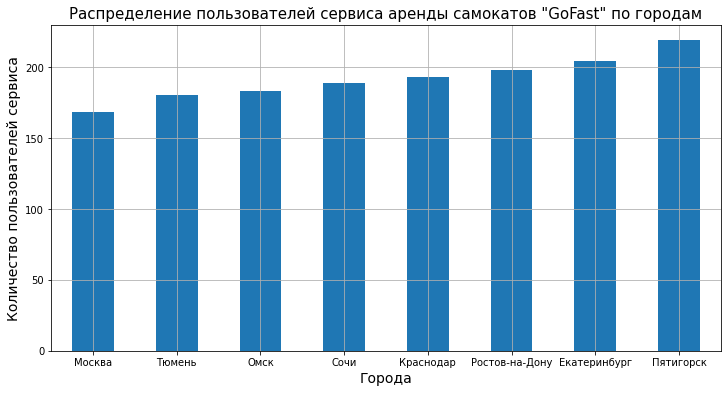

Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
Name: city, dtype: int64

In [23]:
(
data_users['city'].value_counts()
    .sort_values()
    .plot(kind='bar', grid=True, figsize=(12,6))
)
plt.xticks(rotation=0)
plt.title('Распределение пользователей сервиса аренды самокатов "GoFast" по городам', size=15)
plt.xlabel('Города', size=14)
plt.ylabel('Количество пользователей сервиса', size=14)
plt.show()
data_users['city'].value_counts().sort_values()

Минимальное количество пользователей сервиса "GoFast" находится в Москве, максимальное в городе Пятигорск. В основном охвачена центральная часть России, немного восток и южная часть. На удалении от Москвы в южную и восточную стороны, колличество пользователей увеличивается. Можно объяснить это конкуренцией в мегаполисе.

##### Посмотрим на соотношение пользователей с подпиской и без подписки

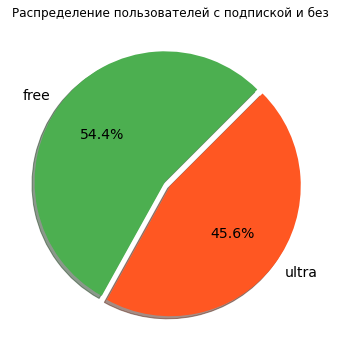

In [24]:
(
data_users['subscription_type']
    .value_counts(normalize=True)
    .plot(kind='pie', autopct='%.1f%%', startangle=45,
          colors=['#4CAF50', '#FF5722'],
         shadow=True, explode=(0.05, 0), figsize=(6,6),
         textprops={'fontsize': 14})
)
plt.title('Распределение пользователей с подпиской и без', size=12)
plt.ylabel('')
plt.show()

Пользователей с подпиской меньше чем без подписки на ~10% от общего количества.

##### Посмотрим на возраст пользователей

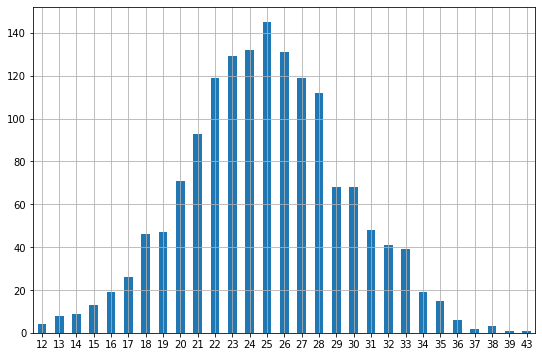

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [25]:
(
data_users['age'].value_counts()
    .sort_index()
    .plot(grid=True, kind='bar', figsize=(9,6))
)
plt.xticks(rotation=0)
plt.show()
data_users['age'].describe()

Как мы видим наиболее популярен сервис у пользователей с возрастом от 22 до 28 лет. Само распределение очень похоже на нормальное распределение Гаусса.

##### Посмотрим на расстояние, которое пользователь преодолел за одну поездку

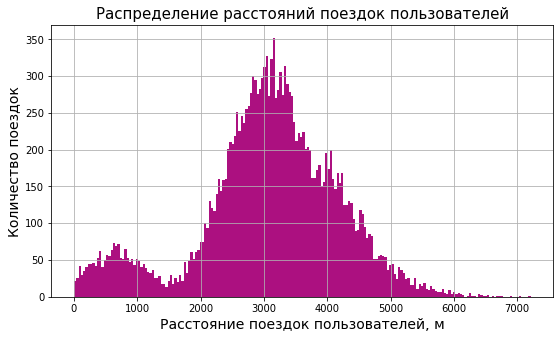

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [26]:
(
data_rides['distance']
    .plot(kind='hist', bins=200, 
          color='#AC1080', grid=True, 
          figsize=(9,5))
)
plt.title('Распределение расстояний поездок пользователей', size=15)
plt.xlabel('Расстояние поездок пользователей, м', size=14)
plt.ylabel('Количество поездок', size=14)
plt.show()
data_rides['distance'].describe()

Медианное расстояние поездок пользователей 3133,6м. По графику мы видим две вершины, условно можно разделить данные на 2 группы. 

Можно предположить, что в выборке имеются данные различных групп пользователей:
* тех кто пользуется сервисом для поездки на работу и домой, для куръерских доставок (длинные расстояния);
* и тех кто катается в парке, на небольшие расстояния ради недолгих развлечений
* * различная инфраструктура городов также вносит свой вклад в значения расстояний

##### Посмотрим на продолжительность поездок пользователей

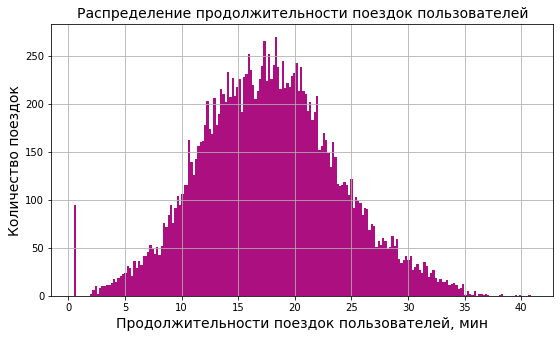

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [27]:
(
data_rides['duration']
    .plot(kind='hist', bins=200, 
          color='#AC1080', grid=True, 
          figsize=(9,5))
)
plt.title('Распределение продолжительности поездок пользователей', size=14)
plt.xlabel('Продолжительности поездок пользователей, мин', size=14)
plt.ylabel('Количество поездок', size=14)
plt.show()
data_rides['duration'].describe()

Наиболее распрсотранненая продолжительность поездок 13,6 - 21,7м. Само распределение очень похоже на нормальное распределение Гаусса.

**Промежуточный вывод**

На данном этапе мы визуализировали общую информацию о пользователях и поездках:
* частоту встречаемости городов:
    * Минимальное количество пользователей сервиса "GoFast" находится в Москве, максимальное в городе Пятигорск. В основном охвачена центральная часть России, немного восток и южная часть. На удалении от Москвы в южную и восточную стороны, колличество пользователей увеличивается. Можно объяснить это конкуренцией в мегаполисе.
    
* Посмотрели на соотношение пользователей с подпиской и без подписки:
    * Пользователей с подпиской меньше чем без подписки на ~10% от общего количества.
    
* Посмотрели на возраст пользователей:
    * наиболее популярен сервис у пользователей с возрастом от 22 до 28 лет. Само распределение очень похоже на нормальное распределение Гаусса
    
* Посмотрели на расстояние, которое пользователь преодолел за одну поездку:
    * Самое распространненое расстояние поездок пользователей 3133,6м. По графику мы видим две вершины, условно можно разделить данные на 2 группы. 
    * Можно предположить, что в выборке имеются данные различных групп пользователей:
        * тех кто пользуется сервисом для поездки на работу и домой, для куръерских доставок (длинные расстояния);
        * и тех кто катается в парке, на небольшие расстояния ради недолгих развлечений
* Посмотрели на продолжительность поездок пользователей:
    * Наиболее распрсотранненая продолжительность поездок 13,6 - 21,7м. Само распределение очень похоже на нормальное распределение Гаусса

#### Шаг 4. Объединение данных

##### Объединим первые два датафрейма по столбцу `user_id`, а с третим по столбцу `subscription_type`

In [28]:
data = (
    data_users.merge(data_rides, how='left', on='user_id')
    .merge(data_subscriptions, how='left', on='subscription_type')
)
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Проверим наши данные после объединения

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [30]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Объединение прошло нормально, количество строк одинаковое по столбцам, и пропусков нет.

##### Создадим ещё два датафрейма из датафрейма, созданного на шаге 4.1

* первый - c данными о пользователях без подписки

In [31]:
data_free = data[data['subscription_type'] == 'free']
data_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


* второй с данными о пользователях с подпиской

In [32]:
data_ultra = data[data['subscription_type'] == 'ultra']
data_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий
* расстояние поездок пользователей с подпиской и без

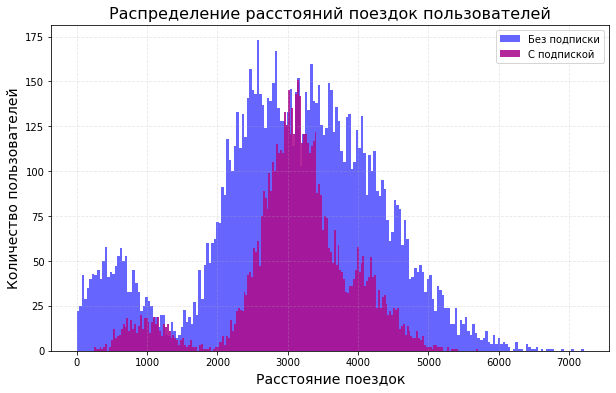

In [33]:
plt.figure(figsize=(10, 6))

(
plt.hist(data_free['distance'], 
         label='Без подписки', bins=200,
          color='blue', alpha=0.6)
)

(
plt.hist(data_ultra['distance'],
    label='С подпиской', bins=200,
    color='#AC1090', alpha=0.9)
)

plt.title('Распределение расстояний поездок пользователей', size=16)
plt.xlabel('Расстояние поездок', size=14)
plt.ylabel('Количество пользователей', size=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [34]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [35]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Медианное расстояние поездок пользователей без подписок 3114,6м. 

По графику мы видим три вершины, условно можно разделить данные на 3 группы.
   * Можно предположить, что в выборке имеются данные различных групп пользователей:
        * тех кто пользуется сервисом для поездки на работу и домой, для куръерских доставок (длинные расстояния);
        * и тех кто катается в парке, на небольшие расстояния ради недолгих развлечений;
        * различная инфраструктура городов также вносит свой вклад в значения расстояний

Медианное расстояние поездок пользователей без подписок 3148,6м. 

По графику мы видим три вершины, условно можно разделить данные на 3 группы.
   * Можно предположить, что в выборке имеются данные различных групп пользователей:
        * тех кто пользуется сервисом для поездки на работу и домой, для куръерских доставок (длинные расстояния);
        * и тех кто катается в парке, на небольшие расстояния ради недолгих развлечений;
        * различная инфраструктура городов также вносит свой вклад в значения расстояний

* время поездок пользователей без подписки

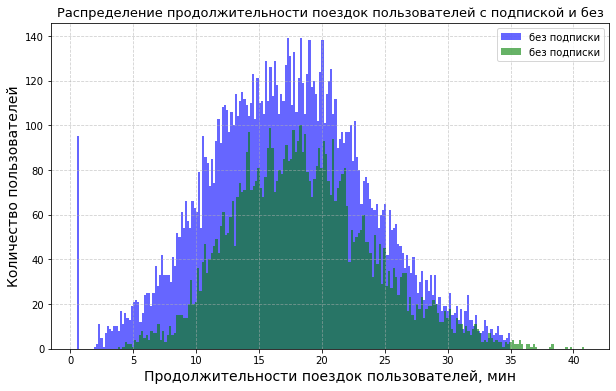

In [36]:
plt.figure(figsize=(10, 6))

(
plt.hist(data_free['duration'], 
         bins=200, label='без подписки',
          color='blue', alpha=0.6)
)

(
plt.hist(data_ultra['duration'], 
         bins=200, label='без подписки',
          color='green', alpha=0.6)
)

plt.title('Распределение продолжительности поездок пользователей с подпиской и без', size=13)
plt.xlabel('Продолжительности поездок пользователей, мин', size=14)
plt.ylabel('Количество пользователей', size=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [37]:
data_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [38]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Оба распределения слегка скошены относительно центра, но все же близки к нормальному. Медианное значение продолжительности поездок без подписки составляет 17.32 мин, с подпиской 18.18 мин.

**Промежуточный вывод**

* Объединили первые два датафрейма по столбцу `user_id`, а с третьим по столбцу `subscription_type` и проверили данные после объединения;

* Создали ещё два датафрейма из датафрейма, созданного на шаге 4.1:
    * первый - c данными о пользователях без подписки;
    * второй с данными о пользователях с подпиской

* Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий:
    * расстояние поездок пользователей без подписок
        * Медианное расстояние поездок пользователей без подписок 3114,6м. По графику мы видим три вершины, условно можно разделить данные на 3 группы.
        * Можно предположить, что в выборке имеются данные различных групп пользователей:
            * тех кто пользуется сервисом для поездки на работу и домой, для куръерских доставок (длинные расстояния);
            * и тех кто катается в парке, на небольшие расстояния ради недолгих развлечений;
            * различная инфраструктура городов также вносит свой вклад в значения расстояний
    * время поездок пользователей без подписки:
        * Распределение близко к нормальному. Медианное значение составляет 17,32мин
    * расстояние поездок пользователей с подпиской:
        * Медианное расстояние поездок пользователей без подписок 3148,6м. По графику мы видим три вершины, условно можно разделить данные на 3 группы.
        * Можно предположить, что в выборке имеются данные различных групп пользователей:
            * тех кто пользуется сервисом для поездки на работу и домой, для куръерских доставок (длинные расстояния);
            * и тех кто катается в парке, на небольшие расстояния ради недолгих развлечений;
            * различная инфраструктура городов также вносит свой вклад в значения расстояний
    * время поездок пользователей без подписки:
        * Распределение слегка скошено относительно центра, но все же близко к нормальному. Медианное значение составляет 18,18мин

#### Шаг 5. Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: 
- найдем:
    * суммарное расстояние;
    * количество поездок;
    * суммарное время для каждого пользователя за каждый месяц

In [39]:
import numpy as np

In [40]:
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [41]:
data['duration'] = np.ceil(data['duration'])
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [42]:
sum_df = (
    data.groupby(['user_id', 'month', 'subscription_type'])
    .agg({'distance':'sum', 
          'duration':['sum', 'size']})
    .reset_index()
)
sum_df.head()

user_id month subscription_type     distance duration     
                                           sum      sum size
0       1     1             ultra  7027.511294     42.0    2
1       1     4             ultra   754.159807      7.0    1
2       1     8             ultra  6723.470560     46.0    2
3       1    10             ultra  5809.911100     32.0    2
4       1    11             ultra  7003.499363     56.0    3

In [43]:
sum_df.columns = ['user_id','month', 'subscription_type', 'distance_sum', 'duration_sum', 'count']
sum_df.head()

,user_id,month,subscription_type,distance_sum,duration_sum,count
0,1,1,ultra,7027.511294,42.0,2
1,1,4,ultra,754.159807,7.0,1
2,1,8,ultra,6723.470560,46.0,2
3,1,10,ultra,5809.911100,32.0,2
4,1,11,ultra,7003.499363,56.0,3


##### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 

* Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа

In [44]:
#sum_df['duration_sum'] = np.ceil(sum_df['duration_sum'])
sum_df.head()

,user_id,month,subscription_type,distance_sum,duration_sum,count
0,1,1,ultra,7027.511294,42.0,2
1,1,4,ultra,754.159807,7.0,1
2,1,8,ultra,6723.470560,46.0,2
3,1,10,ultra,5809.911100,32.0,2
4,1,11,ultra,7003.499363,56.0,3


* добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [45]:
free_price = (
    data_subscriptions
    .loc[data_subscriptions['subscription_type'] == 'free',
         'minute_price'].item()
)

mask_free = (sum_df['subscription_type'] == 'free')
sum_df['multiplier'] = 50 * sum_df['count']
sum_df.loc[mask_free, 'revenue'] = (
    sum_df[mask_free].groupby(['user_id', 'month'])['duration_sum']
    .transform(lambda x: x * free_price) + sum_df.loc[mask_free, 'multiplier']
)

sum_df.head()

,user_id,month,subscription_type,distance_sum,duration_sum,count,multiplier,revenue
0,1,1,ultra,7027.511294,42.0,2,100,NaN
1,1,4,ultra,754.159807,7.0,1,50,NaN
2,1,8,ultra,6723.470560,46.0,2,100,NaN
3,1,10,ultra,5809.911100,32.0,2,100,NaN
4,1,11,ultra,7003.499363,56.0,3,150,NaN


In [46]:
sum_df.tail()

,user_id,month,subscription_type,distance_sum,duration_sum,count,multiplier,revenue
11326,1534,6,free,3409.468534,26.0,2,100,308.0
11327,1534,8,free,7622.453034,48.0,2,100,484.0
11328,1534,9,free,4928.173852,23.0,1,50,234.0
11329,1534,11,free,13350.015305,78.0,4,200,824.0
11330,1534,12,free,2371.711192,16.0,1,50,178.0


In [47]:
ultra_price = (
    data_subscriptions
    .loc[data_subscriptions['subscription_type'] == 'ultra',
         'minute_price'].item()
)

mask_ultra = (sum_df['subscription_type'] == 'ultra')

sum_df.loc[mask_ultra, 'revenue'] = (
    sum_df[mask_ultra].groupby(['user_id', 'month'])['duration_sum']
    .transform(lambda x: x * ultra_price + 199)
)

sum_df.head()

,user_id,month,subscription_type,distance_sum,duration_sum,count,multiplier,revenue
0,1,1,ultra,7027.511294,42.0,2,100,451.0
1,1,4,ultra,754.159807,7.0,1,50,241.0
2,1,8,ultra,6723.470560,46.0,2,100,475.0
3,1,10,ultra,5809.911100,32.0,2,100,391.0
4,1,11,ultra,7003.499363,56.0,3,150,535.0


**Промежуточный вывод**

* продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлили до следующего целого числа;
* создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными на этапе 4:
    * суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц
* в этот же датафрейм добавили столбец с помесячной выручкой, которую принёс каждый пользователь

#### Шаг 6. Проверка гипотез

##### Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

* Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [48]:
from scipy import stats as st

In [49]:
len(data_free)

11568

In [50]:
len(data_ultra)

6500

Используем проверку гипотезы о равенстве средних двух генеральных совокупностей. За Но примем что средняя потраченного времени пользователей с подпиской и без равны, за альтернативную гипотезу Н1 - что средняя потраченного времени пользователей с подпиской по месяцам выше, чем пользователей без подписки.

In [51]:
alpha = 0.05

results = st.ttest_ind(data_ultra['duration'], data_free['duration'], equal_var=False, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве времени, которое тратят пользователи с подпиской и без не потвердилась, а дпополнительный параметр `alternative='greater'` нам говорит о том что пользователи с подпиской в среднем тратят больше времени на поездки.

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. 
* Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы

Используем проверку односторонней гипотезы. За Но примем что среднее расстояние которое проезжают пользователи с подпиской за одну поездку равно 3130 метров, за альттернативную гипотезу Н1 примем это что среднее расстояние больше чем 3130 метров.

In [52]:
interested_value = 3130

alpha = 0.05

results = st.ttest_1samp(data_ultra['distance'], interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть гипотезу Но, значит можно предположить что среднее которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

##### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [53]:
len(sum_df.loc[sum_df['subscription_type'] == 'ultra', 'revenue'])

4533

In [54]:
len(sum_df.loc[sum_df['subscription_type'] == 'free', 'revenue'])

6798

Используем проверку гипотезы о равенстве средних двух генеральных совокупностей. За Но примем что средняя помесячная выручка от пользователей с подпиской и без равны, за альтернативную гипотезу Н1 - что средняя выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [55]:
alpha = 0.05

values_ultra = sum_df.loc[sum_df['subscription_type'] == 'ultra', 'revenue']
values_free = sum_df.loc[sum_df['subscription_type'] == 'free', 'revenue']

results = st.ttest_ind(values_ultra, values_free, equal_var=False, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве помесячной выручки от пользователей с подпиской и без не потвердилась, а дпополнительный параметр `alternative='greater'` нам говорит о том что пользователи с подпиской в среднем приносят больше.

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Нам понадобиться тест`st.ttest_rel(values_1, values_2, alternative='greater')` при условии одинаковой размерности выборок.
При этом за нулевую гипотезу Но мы примем **количестве обращений до обновления и после него не изменилось**, 
альтернативная Н1 - **количестве обращений до обновления больше чем после**

**Промежуточный вывод**

* Используя исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки проверили гипотезу тратят ли пользователи с подпиской больше времени на поездки?
    * Использовали проверку гипотезы о равенстве средних двух генеральных совокупностей. За Но приняли что средняя потраченного времени пользователей с подпиской и без равны, за альтернативную гипотезу Н1 - что средняя потраченного времени пользователей с подпиской по месяцам выше, чем пользователей без подписки.:
        * p-значение: 5.6757813771289775e-37, отвергаем нулевую гипотезу
        * Нулевая гипотеза о равенстве времени, которое тратят пользователи с подпиской и без не потвердилась, а дпополнительный параметр alternative='greater' нам говорит о том что пользователи с подпиской в среднем тратят больше времени на поездки.
        
        
* Проверили гипотезу, можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
    * Использовали проверку односторонней гипотезы. За Но приняли что среднее расстояние которое проезжают пользователи с подпиской за одну поездку равно 3130 метров, за альттернативную гипотезу Н1 приняли это что среднее расстояние больше чем 3130 метров
        * p-значение: 0.9195368847849785, не получилось отвергнуть нулевую гипотезу
        * Не получилось отвергнуть гипотезу Но, значит можно предположить что среднее которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров
        
        
* Проверили гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
    * Используя проверку гипотезы о равенстве средних двух генеральных совокупностей. За Но приняли что средняя помесячная выручка от пользователей с подпиской и без равны, за альтернативную гипотезу Н1 - что средняя выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
        * p-значение: 8.874140893976874e-40
        * Нулевая гипотеза о равенстве помесячной выручки от пользователей с подпиской и без не потвердилась, а дпополнительный параметр alternative='greater' нам говорит о том что пользователи с подпиской в среднем приносят больше

#### Шаг 7. Распределения

##### Отделу маркетинга GoFast поставили задачу:
* нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Построим график кумулятивной функции распределения (CDF) для биномиального распределения с параметрами:
* p = 0.1 (вероятность успеха)
* n - подберем такое значение, при котором вероятность неуспеха получить 100 продлений подписки будет равна 5%

In [56]:
from scipy.stats import binom, norm

In [57]:
p = 0.1
target_prob = 0.05
min_k = 99

n = 1000
while True:
    cdf = binom.cdf(min_k, n, p)
    if cdf <= target_prob:
        break
    n += 1

print(f"Минимальное n: {n}") 

Минимальное n: 1161


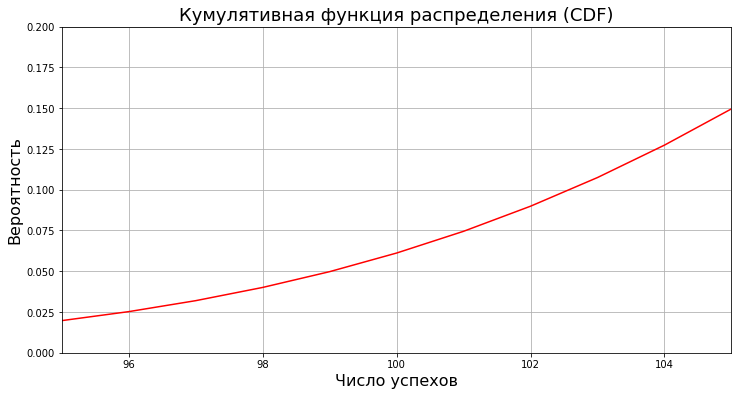

In [58]:
n = 1161
p = 0.1

k_values = range(0, n + 1)

cdf_values = [binom.cdf(k, n, p) for k in k_values]

plt.figure(figsize=(12, 6))
plt.plot(k_values, cdf_values, 'r-')
plt.xlabel('Число успехов', size=16)
plt.ylabel('Вероятность', size=16)
plt.title('Кумулятивная функция распределения (CDF)', size=18)
plt.grid(True)
plt.xlim(95, 105)
plt.ylim(0, 0.2)
plt.show()

Минимальное количество промокодов, которое нужно разослать, чтобы вероятность не выполнить план 5%, равно примерно 1172шт

##### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Воспользуемся нормальной аппроксимацией биномиального распределения и cdf() для быстрой оценки.
* для начала проверим условие выполнения апроксимации нормальным распределением

In [59]:
from math import sqrt

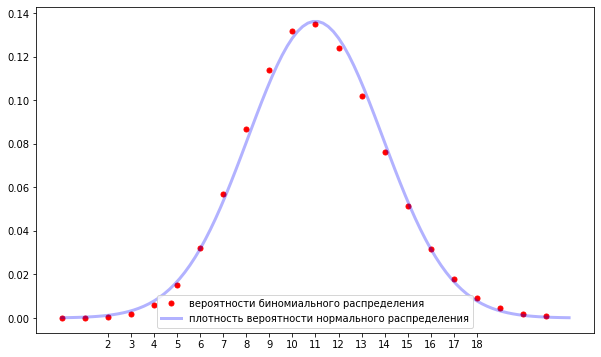

Условие выполняется


In [60]:
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
n = 50
p = 0.22

left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))

plt.figure(figsize=(10, 6))
x = list(range(max(0, left), right))
ax = plt.subplot()
ax.plot(x, binom.pmf(x, n, p), 'ro', ms=5,
	      label='вероятности биномиального распределения')

mu = n * p
sigma = sqrt(n * p * (1 - p))
 
x = linspace(left, right, 100)
ax.plot(x, norm.pdf(x, mu, sigma), 'b-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')

x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
ax.set_xticks(x_ticks)

ax.legend(loc='best')
plt.show()

if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

* Оценим вероятность того, что уведомление откроют не более 399,5 тыс.

In [61]:
n = 1000000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1 - p))

distr = st.norm(mu, sigma)

result = distr.cdf(399500)
round(result, 3)

0.154

Вероятность того что уведомление откроют не более 399,5 тыс равна 15,4%

**Общий вывод**

1) Мы считали данные. Предварительно по нашим данным:
* по первой таблице 5 столбцов и 1565 строк, колоичество строк не отличается между столбцами;
* по второй таблице 4 столбца и 18068 строк, аналогично количество строк не отличается между столбцами;
    * в столбце с датой тип данных - `object`, необходимо будет изменить в дальнейшем на тип `datetime`
* по 3 таблице там всего 4 столбца и 2 строки

2) Предобработка:
    На данном этапе мы:
* Изменили тип данных в столбце `date` датафрейма `data_rides` с **object на datetime**;
* Создали новый столбец `month` с номером месяца на основе столбца `date`;
* Проверили наличие пропущенных значений и дубликатов в датафреймах, которых не оказалось;
* Проверили на наличие явных дубликатов и произвели их удаление в датафрейме data_users

3) Исследовательский анализ данных:
На данном этапе мы визуализировали общую информацию о пользователях и поездках:
* частоту встречаемости городов:
    * Минимальное количество пользователей сервиса "GoFast" находится в Москве, максимальное в городе Пятигорск. В основном охвачена центральная часть России, немного восток и южная часть. На удалении от Москвы в южную и восточную стороны, колличество пользователей увеличивается. Можно объяснить это конкуренцией в мегаполисе.
    
* Посмотрели на соотношение пользователей с подпиской и без подписки:
    * Пользователей с подпиской меньше чем без подписки на ~10% от общего количества.
    
* Посмотрели на возраст пользователей:
    * наиболее популярен сервис у пользователей с возрастом от 22 до 28 лет. Само распределение очень похоже на нормальное распределение Гаусса
    
* Посмотрели на расстояние, которое пользователь преодолел за одну поездку:
    * Самое распространненое расстояние поездок пользователей 3133,6м. По графику мы видим две вершины, условно можно разделить данные на 2 группы. 
    * Можно предположить, что в выборке имеются данные различных групп пользователей:
        * тех кто пользуется сервисом для поездки на работу и домой, для куръерских доставок (длинные расстояния);
        * и тех кто катается в парке, на небольшие расстояния ради недолгих развлечений
* Посмотрели на продолжительность поездок пользователей:
    * Наиболее распрсотранненая продолжительность поездок 13,6 - 21,7м. Само распределение очень похоже на нормальное распределение Гаусса
    
4) Объединение данных:
* Объединили первые два датафрейма по столбцу `user_id`, а с третьим по столбцу `subscription_type` и проверили данные после объединения;

* Создали ещё два датафрейма из датафрейма, созданного на шаге 4.1:
    * первый - c данными о пользователях без подписки;
    * второй с данными о пользователях с подпиской

* Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий:
    * расстояние поездок пользователей без подписок
        * Медианное расстояние поездок пользователей без подписок 3114,6м. По графику мы видим три вершины, условно можно разделить данные на 3 группы.
        * Можно предположить, что в выборке имеются данные различных групп пользователей:
            * тех кто пользуется сервисом для поездки на работу и домой, для куръерских доставок (длинные расстояния);
            * и тех кто катается в парке, на небольшие расстояния ради недолгих развлечений;
            * различная инфраструктура городов также вносит свой вклад в значения расстояний
    * время поездок пользователей без подписки:
        * Распределение близко к нормальному. Медианное значение составляет 17,32мин
    * расстояние поездок пользователей с подпиской:
        * Медианное расстояние поездок пользователей без подписок 3148,6м. По графику мы видим три вершины, условно можно разделить данные на 3 группы.
        * Можно предположить, что в выборке имеются данные различных групп пользователей:
            * тех кто пользуется сервисом для поездки на работу и домой, для куръерских доставок (длинные расстояния);
            * и тех кто катается в парке, на небольшие расстояния ради недолгих развлечений;
            * различная инфраструктура городов также вносит свой вклад в значения расстояний
    * время поездок пользователей без подписки:
        * Распределение слегка скошено относительно центра, но все же близко к нормальному. Медианное значение составляет 18,18мин
        
5) Подсчет выручки:
* продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлили до следующего целого числа;
* создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными на этапе 4:
    * суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц
* в этот же датафрейм добавили столбец с помесячной выручкой, которую принёс каждый пользователь

6) Проверка гипотез:
* Используя исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки проверили гипотезу тратят ли пользователи с подпиской больше времени на поездки?
    * Использовали проверку гипотезы о равенстве средних двух генеральных совокупностей. За Но приняли что средняя потраченного времени пользователей с подпиской и без равны, за альтернативную гипотезу Н1 - что средняя потраченного времени пользователей с подпиской по месяцам выше, чем пользователей без подписки.:
        * p-значение: 5.6757813771289775e-37, отвергаем нулевую гипотезу
        * Нулевая гипотеза о равенстве времени, которое тратят пользователи с подпиской и без не потвердилась, а дпополнительный параметр alternative='greater' нам говорит о том что пользователи с подпиской в среднем тратят больше времени на поездки.
        
        
* Проверили гипотезу, можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
    * Использовали проверку односторонней гипотезы. За Но приняли что среднее расстояние которое проезжают пользователи с подпиской за одну поездку равно 3130 метров, за альттернативную гипотезу Н1 приняли это что среднее расстояние больше чем 3130 метров
        * p-значение: 0.9195368847849785, не получилось отвергнуть нулевую гипотезу
        * Не получилось отвергнуть гипотезу Но, значит можно предположить что среднее которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров
        
        
* Проверили гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
    * Используя проверку гипотезы о равенстве средних двух генеральных совокупностей. За Но приняли что средняя помесячная выручка от пользователей с подпиской и без равны, за альтернативную гипотезу Н1 - что средняя выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
        * p-значение: 8.874140893976874e-40
        * Нулевая гипотеза о равенстве помесячной выручки от пользователей с подпиской и без не потвердилась, а дпополнительный параметр alternative='greater' нам говорит о том что пользователи с подпиской в среднем приносят больше
        
7) Распределения:
    * Построили график кумулятивной функции распределения (CDF) для биномиального распределения и определили минимальное количество промокодов, которое нужно разослать, чтобы вероятность не выполнить план 5%, равно примерно 1172шт
    * Воспользуемся нормальной аппроксимацией биномиального распределения и cdf() для быстрой оценки:
        * проверили условие выполнения апроксимации нормальным распределением
        * Оценим вероятность того, что уведомление откроют не более 399,5 тыс, составляет ~15,4%